# DeepVM Figure making

## 1. Loading ieee style

In [1]:
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science', 'ieee'])
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["sans-serif"],
    "font.size":8}) 

ModuleNotFoundError: No module named 'matplotlib'

## 2. Drawing Figure 1,2

### 2-1. Open data and parsing

In [43]:
import pandas as pd
import numpy as np

xlsx_file_path = 'exp1.xlsx'
df = pd.read_excel(xlsx_file_path)
rank_array = np.array(['1st\n(NoScale)', '2nd','3rd','Cost\nFirst', 'Perf\nFirst'])
makespan_array = df['makespan'].to_numpy()
hourly_price_array = df['hourly price'].to_numpy()

total_price_array = makespan_array * hourly_price_array / 3600

print(rank_array)
print(makespan_array)
print(hourly_price_array)
print(total_price_array)

['1st\n(NoScale)' '2nd' '3rd' 'Cost\nFirst' 'Perf\nFirst']
[251.2481    252.1270916 251.1276834 296.7717757 493.9301716]
[2.8526 2.8746 2.8986 2.893  2.8168]
[0.1990862  0.20132348 0.20219964 0.2384891  0.38647292]


### 2-2. figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 990x750 with 0 Axes>

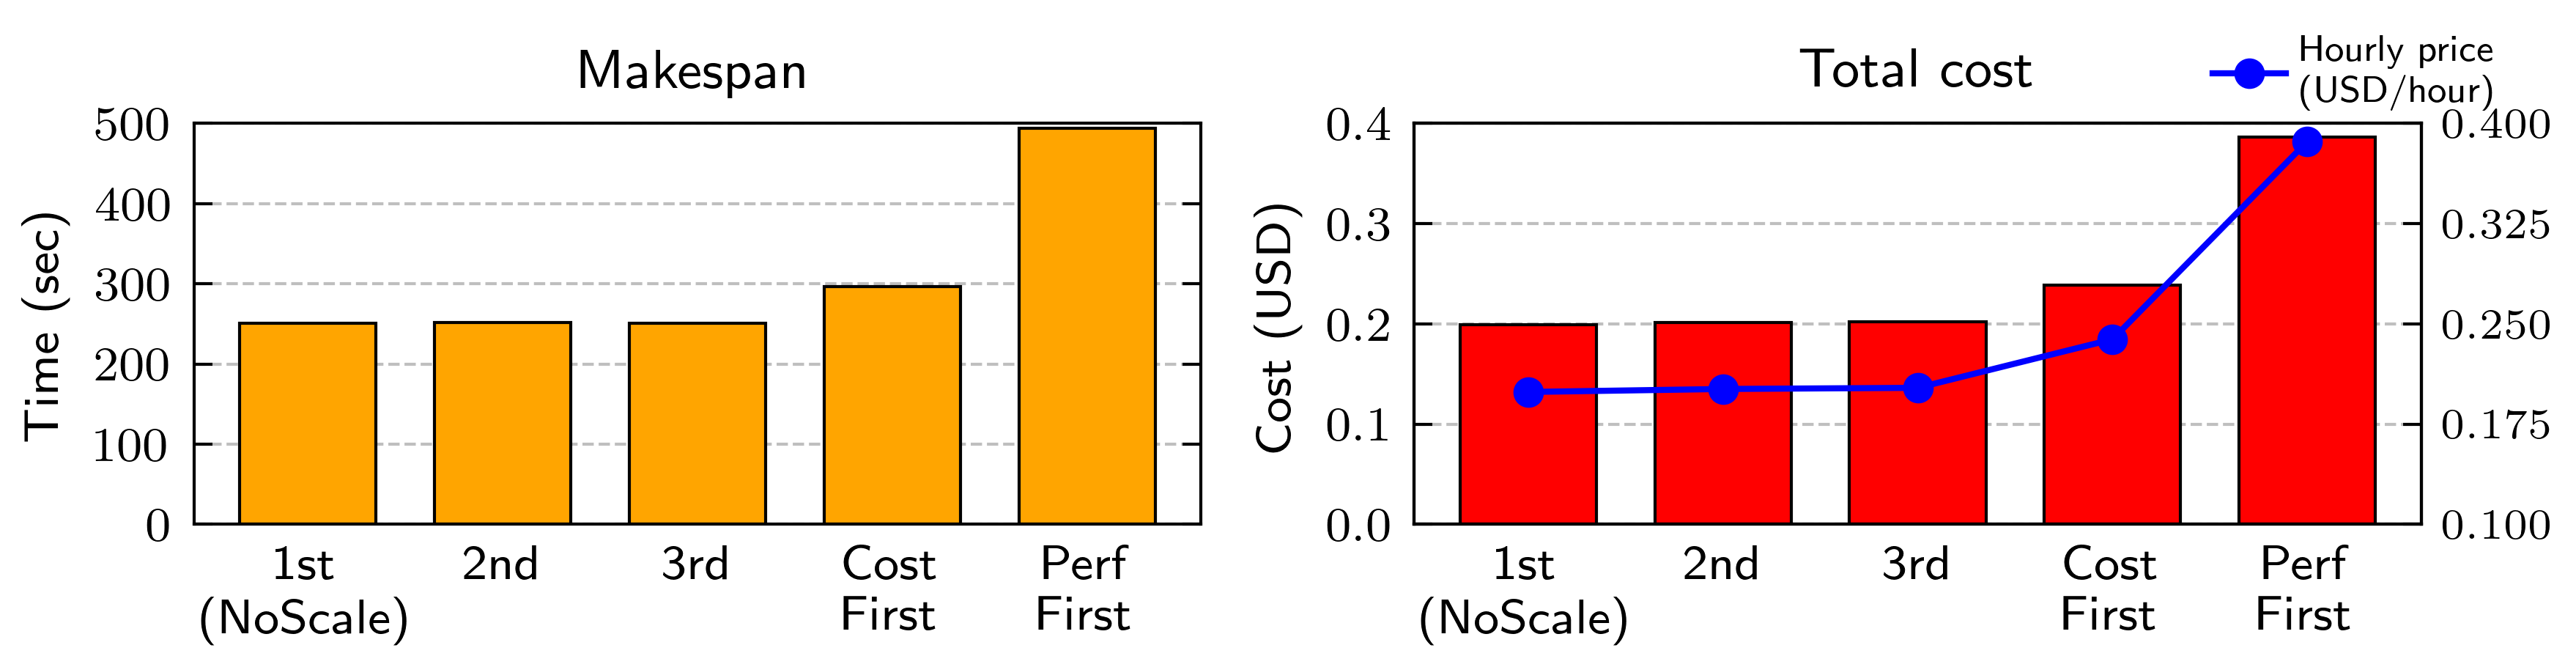

In [44]:
plt.figure(dpi=300)
ratio = 2
width = 0.7 # image size

# making subplots
fig, axs = plt.subplots(1, 2, figsize=(3*ratio, 0.9*ratio)) 

# grid
for ax in axs:
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=1)

# major gridlines of y axis
axs[0].yaxis.set_major_locator(plt.MultipleLocator(100))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))

# histogram bars (x, y, color, width, edge color, edge line width, order of Z)
axs[0].bar(rank_array, makespan_array, color='orange', width=width, edgecolor='black', linewidth=0.5, zorder=2)
axs[1].bar(rank_array, total_price_array, color='red', width=width, edgecolor='black', linewidth=0.5, zorder=2)

# title
axs[0].set_title("Makespan", fontsize=9)
axs[1].set_title("Total cost", fontsize=9)

# delete x gridlines(ticks)
axs[0].tick_params(axis='x', which='both', length=0, labelbottom=True)
axs[1].tick_params(axis='x', which='both', length=0, labelbottom=True)

# delete y minor gridlines(ticks)
axs[0].tick_params(axis='y', which='minor', length=0, labelbottom=True)
axs[1].tick_params(axis='y', which='minor', length=0, labelbottom=True)

# tick label size
axs[0].tick_params(axis='x', labelsize=8, rotation=0)
axs[0].tick_params(axis='y', labelsize=8)
axs[1].tick_params(axis='x', labelsize=8, rotation=0)
axs[1].tick_params(axis='y', labelsize=8)

# max and min value of axis
axs[0].set_ylim(0, 500)
axs[1].set_ylim(0, 0.4)

# label
axs[0].set_ylabel('Time (sec)', fontsize=8)
axs[1].set_ylabel('Cost (USD)', fontsize=8)

# dual y-axis
ax2 = axs[1].twinx()
ax2.tick_params(axis='y', which='minor', length=0, labelbottom=True)
new_data_array = total_price_array
ax2.tick_params(axis='y', labelsize=7)
ax2.set_ylim([0.1, 0.4]) 
ticks = np.arange(0.1, 0.4 + 0.075, 0.075)
ax2.set_yticks(ticks)
# ax2.yaxis.set_major_locator(plt.MultipleLocator(0.075))
ax2.plot(rank_array, new_data_array, color='blue', marker='o', linestyle='-', label='Hourly price\n(USD/hour)', markersize=4)
leg = ax2.legend(loc='upper right', fontsize=6, bbox_to_anchor=(1.11, 1.3),  handletextpad=0.4)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2)

# delete margin
plt.tight_layout()

# export
plt.savefig('plan_aws.eps', format='eps')

### 2-3 figure 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 990x750 with 0 Axes>

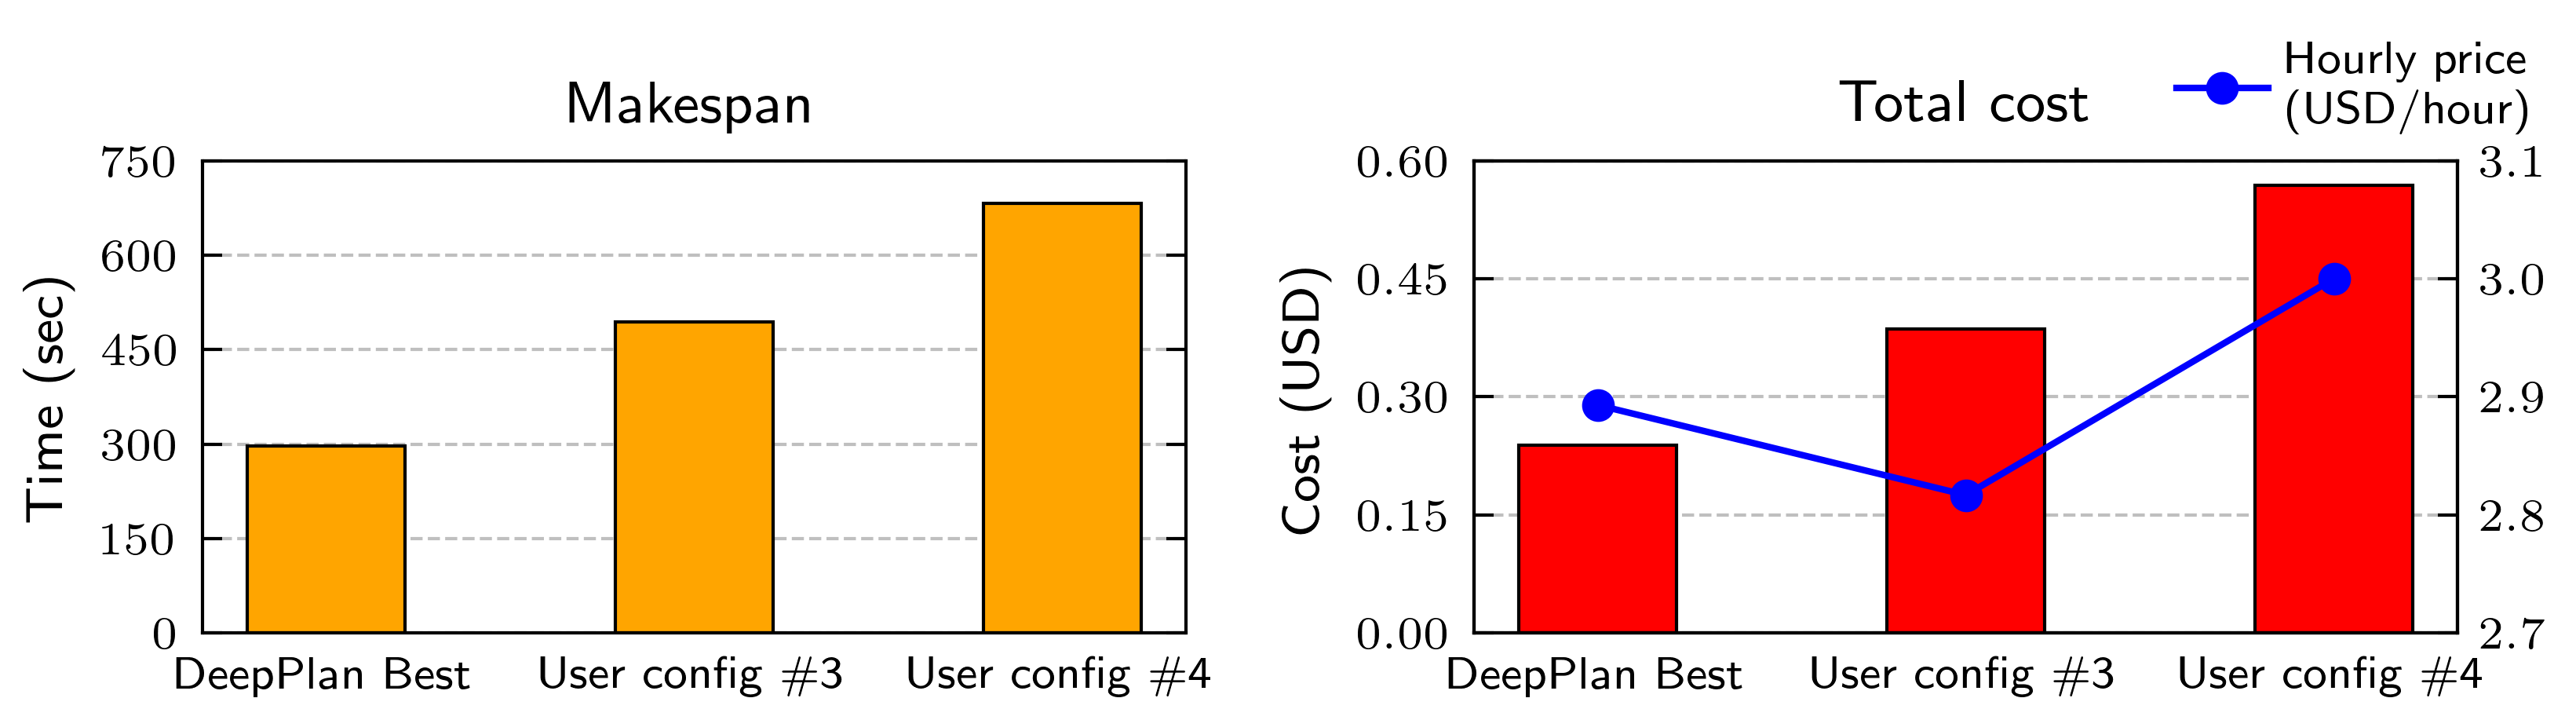

In [26]:
plt.figure(dpi=300)
ratio = 2
width = 0.3

fig, axs = plt.subplots(1, 2, figsize=(2.8*ratio, 0.9*ratio))

# data
sa_rank_array = np.array(['DeepPlan Best', 'User config \#3', 'User config \#4'])
sa_makespan_array = np.array([296.7717757,493.9301716,682.1904776])
sa_total_price_array = np.array([0.2384890964,0.3864729187,0.5684920647])

x_values = np.arange(len(sa_rank_array))
spacing = 0.7
x_values = x_values * spacing

for ax in axs:
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=1)
axs[0].yaxis.set_major_locator(plt.MultipleLocator(150))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.15))

axs[0].bar(x_values, sa_makespan_array, color='orange', width=width, edgecolor='black', linewidth=0.5, zorder=2)
axs[1].bar(x_values, sa_total_price_array, color='red', width=width, edgecolor='black', linewidth=0.5, zorder=2)

for ax in axs:
    ax.set_xticks(x_values)
    ax.set_xticklabels(sa_rank_array)

axs[0].set_title("Makespan", fontsize=9)
axs[1].set_title("Total cost", fontsize=9)

axs[0].tick_params(axis='x', which='both', length=0, labelbottom=True)
axs[1].tick_params(axis='x', which='both', length=0, labelbottom=True)

axs[0].tick_params(axis='y', which='minor', length=0, labelbottom=True)
axs[1].tick_params(axis='y', which='minor', length=0, labelbottom=True)

axs[0].tick_params(axis='x', labelsize=7, rotation=0)
axs[0].tick_params(axis='y', labelsize=7)

axs[1].tick_params(axis='x', labelsize=7, rotation=0)
axs[1].tick_params(axis='y', labelsize=7)

axs[0].set_ylim(0, 750)
axs[1].set_ylim(0, 0.6)

axs[0].set_ylabel('Time (sec)', fontsize=8)
axs[1].set_ylabel('Cost (USD)', fontsize=8)

ax2 = axs[1].twinx()
sa_new_data_array = np.array([2.893,2.8168,3])
ax2.tick_params(axis='y', which='minor', length=0, labelbottom=True)
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax2.tick_params(axis='y', labelsize=7)
ax2.set_ylim([2.7, 3.1]) 
ax2.plot(x_values, sa_new_data_array, color='blue', marker='o', linestyle='-', label='Hourly price\n(USD/hour)', markersize=4)
leg = ax2.legend(loc='upper right', fontsize=7, bbox_to_anchor=(1.12, 1.34),  handletextpad=0.4)

leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2)

plt.tight_layout()
plt.savefig('1_plan_val_single.eps', format='eps')

## 3. Drawing figure 3

### 3-1. Open data and parsing

In [ ]:
xlsx_file_path = 'exp2.xlsx'
xls = pd.ExcelFile(xlsx_file_path)
sheet_names = xls.sheet_names

nodes_data = {}
speedup_data = {}
planner_data = {}

for sheet in sheet_names:
    df = pd.read_excel(xlsx_file_path, sheet_name=sheet)
    
    if 'nodes' in df.columns:
        nodes_data[sheet] = df['nodes'].to_numpy()
    if 'speedup' in df.columns:
        speedup_data[sheet] = df['speedup'].to_numpy()
    if 'planner' in df.columns:
        planner_data[sheet] = df['planner'].to_numpy()


print(nodes_data)
print(speedup_data)
print(planner_data)

In [ ]:
relative_diff = {}
for gpu in ['g3s','g4','g5']:
    relative_diff[gpu] = np.abs(speedup_data[gpu] - planner_data[gpu]) / np.maximum(speedup_data[gpu], planner_data[gpu])

### 3-2. ploting

In [ ]:
from matplotlib.lines import Line2D

ratio = 2.3
plt.figure(dpi=300)
fig, axs = plt.subplots(1, 3, figsize=(2.5*ratio, 0.7*ratio))

# dual axis
ax = [None]*3

titles = ['g3s.xlarge','g4dn.xlarge','g5.xlarge']
xs = [0.185,0.19,0.18]

# ploting 3 graph using for-loop
for i, gpu in enumerate(['g3s','g4','g5']):
    # setting title
    axs[i].set_title(titles[i], fontsize='7', x=xs[i])

    # graph (first axis) -> Speedup graph
    axs[i].plot(nodes_data[gpu], speedup_data[gpu], '-', color='blue', label='Speedup')
    axs[i].plot(nodes_data[gpu], planner_data[gpu], '-', color='red', label='Estimated speedup')
    axs[i].set_xlim([1,32])

    # gridlines of x axis
    axs[i].tick_params(axis='x', which='both', labelbottom=True)

    # graph (second axis) -> Error graph
    ax[i] = axs[i].twinx()
    ax[i].plot(nodes_data[gpu], relative_diff[gpu]*100, color='orange', label='Error(\%)')
    ax[i].set_ylim([0,100])

    # set tick labels' font size
    axs[i].tick_params(axis='x', labelsize=6, rotation=0) # you can use 'rotation' parameters to rotate labels.
    axs[i].tick_params(axis='y', labelsize=6)
    ax[i].tick_params(axis='x', labelsize=6, rotation=0)
    ax[i].tick_params(axis='y', labelsize=6)


lw = 1.2
legend_handles = [Line2D([0], [0], color='blue', lw=lw, label='Speedup'),
                  Line2D([0], [0], color='red', lw=lw, label='Estimated speedup'),
                  Line2D([0], [0], color='orange', lw=lw, label='Error(\%)')]

# Display the legend for the entire figure
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.92), ncol=3, fontsize=6, columnspacing=1.2, handletextpad=0.6)
fig.suptitle("Number of remote nodes (\#)", fontsize=6.5, y=0.05)
axs[0].set_ylabel('Speedup', fontsize=6.5)
ax[2].set_ylabel('Error rate (\%)', fontsize=6.5)

# legend 를 그리는 더 괜찮은 방식이 있지만 twin axis의 데이터까지 깔끔하게 legend로 만들려면 위처럼 하나하나 정의하고 fig.legend 함수를 사용해야함

plt.tight_layout()
plt.savefig('2_speedup_val.eps', format='eps')

## 4. Drawing figure 4

### 4-1. declaration of data

In [ ]:
remote_count = np.array([i for i in range(1,8)])
pgts = np.array([24.21574794,4.89487428,2.47979097,1.72168716,1.38707916,1.28920944,1.20060822])
reductions = np.array([(pgts[i])/pgts[2] for i in range(0,7)])
print(reductions)

### 4-2. ploting

In [ ]:
ratio = 3
plt.figure(dpi=300)
fig, axs = plt.subplots(1, 1, figsize=(1.1*ratio, 0.45*ratio))

fig.suptitle("Number of remote nodes (\#)", fontsize=5, y=0.08)
axs.bar(remote_count, pgts, color='orange', label='pgt', edgecolor='black', linewidth=0.3, zorder=2)
axs.xaxis.set_major_locator(plt.MultipleLocator(1))

axs.tick_params(axis='x', which='both', length=0, labelbottom=True, labelsize=5.5)
axs.tick_params(axis='y', labelsize=5)
axs.set_ylim([0,25])
axs.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=1)
axs.axvline(x=3, lw=1, linestyle=':', zorder=1, alpha=0.8, color='black')

ax2 = axs.twinx()
ax2.tick_params(axis='y', labelsize=5)
ax2.plot(remote_count, reductions, '-', color='red', label='reduction', zorder=3, marker='o', markersize=3)
ax2.set_ylim([0,12])

ax2.tick_params(axis='y', which='minor', length=0, labelbottom=True)
axs.tick_params(axis='y', which='minor', length=0, labelbottom=True)
ax2.yaxis.set_major_locator(plt.MultipleLocator(2.4))

lw = 1.2
legend_handles = [Line2D([0], [0], color='red', lw=lw, label='time extension'),
                  Line2D([0], [0], color='black', lw=lw, label='DeepVM pick', linestyle='--', alpha=0.8)]
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.88), ncol=2, fontsize=5, columnspacing=0.7, handletextpad=0.4)

axs.set_ylabel('Transmission time (sec)', fontsize=5)
ax2.set_ylabel('Extension Ratio', fontsize=5)
axs.yaxis.set_label_coords(-0.065,0.5)
ax2.yaxis.set_label_coords(1.08,0.5)

plt.tight_layout()
plt.savefig('3_bw_val.eps', format='eps')